In [1]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [7]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [16]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [17]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [18]:
# Save references to each table
Measure = Base.classes.measurement

Station = Base.classes.station

In [19]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [24]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measure.date).order_by(Measure.date.desc()).first()
most_recent_date

('2017-08-23')

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date

# Calculate the date one year from the last date in data set.
year_ago = dt.datetime(2017,8,23) - dt.timedelta(days=365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(Measure.date, Measure.prcp).filter(Measure.date >= year_ago).all()
prcp_query

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_query, columns = ['Date', 'Precipitation'])
prcp_df

# Sort the dataframe by date
prcp_df = prcp_df.sort_values('Date')


2016-08-23 00:00:00


,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [29]:
#Drop nan using dropna
prcp_df.dropna(inplace=True)
prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           2015 non-null   object 
 1   Precipitation  2015 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.2+ KB


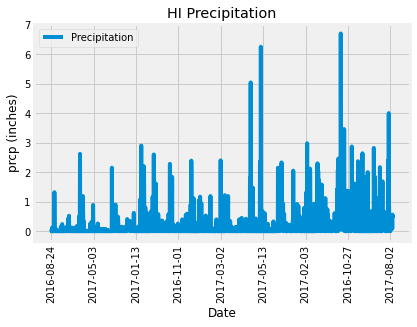

<Figure size 432x288 with 0 Axes>

In [36]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x='Date', y='Precipitation', rot=90)
#add title 
plt.title("HI Precipitation")
plt.ylabel('prcp (inches)') 
plt.show()
plt.tight_layout()
plt.savefig("./Images/HI_Precp_2016")

In [35]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).all()

#count
count_of_stations = session.query(func.count(Station.station)).first()[0]
count_of_stations

9

In [50]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measure.station, func.count(Measure.station)).\
                    group_by(Measure.station).\
                    order_by(func.count(Measure.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [56]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_activity[0] 
most_active_station

# get lowest, highest, average temperature use sel technique
sel = [func.max(Measure.tobs), func.avg(Measure.tobs), func.min(Measure.tobs)]
temp_stats = session.query(*sel).\
    filter(Measure.station == 'USC00519281').all()
temp_stats

[(85.0, 71.66378066378067, 54.0)]

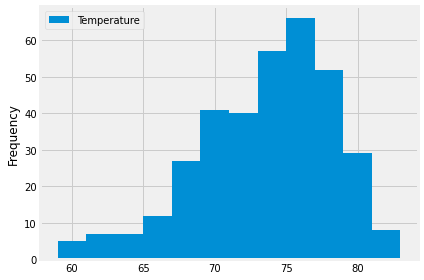

<Figure size 432x288 with 0 Axes>

In [62]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_query = session.query(Measure.tobs).\
    filter(Measure.station == 'USC00519281').\
        filter(Measure.date >= year_ago).all()
        
tobs_df = pd.DataFrame(most_active_station_query, columns = ['Temperature']) 

tobs_df.plot.hist(bins=12)
plt.tight_layout()
plt.show()
plt.savefig('./Images/HI_temp_2016to2017.png')

# Close Session

In [63]:
# Close Session
session.close()